Tool for made a quick data review from afc csv file



In [1]:
#import necesary libraries
import pandas as pd
import io
import numpy as np
import seaborn as sns
import earthpy as et

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")
import matplotlib.pyplot as plt


#simulated
#data1 = pd.read_csv(r'D:\OneDrive\OneDrive - WFT\Compartido\Flow Measurements\Operations\PlusPetrol_LC_Test_Movil\PAD_3001\raw\Log17022021.csv')

#
data1 = pd.read_csv(r'D:\OneDrive\OneDrive - WFT\Compartido\Flow Measurements\Operations\PlusPetrol_LC_Test_Movil\PAD_G2\LC-3083\LC_3083_csv.csv',low_memory=False)

#data1 = pd.read_csv(r'D:\OneDrive\OneDrive - WFT\Compartido\Flow Measurements\Operations\PlusPetrol_LC_Test_Movil\PAD_K3\LC-3012\Log04032021.csv')

#data1 = pd.read_csv(r'D:\OneDrive\OneDrive - WFT\Compartido\Well_Datasets\La_Calera_Pluspetrol\FSF_mov\logs\LC_raw_full.csv',low_memory=False)


print("Data Loaded OK")

Data Loaded OK


In [4]:
data1.columns

Index(['Well No.', 'Time', 'Pressure[Bar]', 'DP[Bar]', 'Temperature[C]',
       'Velocity[m/s]', 'Quality', 'Gamma_Dens[kg/m3]', 'Raw_Dens',
       'WaterCut[%]', 'Xl', 'WWC[%]', 'ch1[nA]', 'ch2[nA]', 'ch3[nA]',
       'ch4[nA]', 'ch5[nA]', 'BrdTemp[C]', 'Qg[m3/s]', 'Ql[m3/s]', 'Qo[m3/s]',
       'Qw[m3/s]', 'QgStd[m3/s]', 'QlStd[m3/s]', 'QoStd[m3/s]', 'QwStd[m3/s]',
       'Vg[m3]', 'Vl[m3]', 'Vo[m3]', 'Vw[m3]', 'VgStd[m3]', 'VlStd[m3]',
       'VoStd[m3]', 'VwStd[m3]', 'TotWLR[%]', 'TotGOR', 'GVF[%]', 'XLM',
       'Frg_dp_out', 'mode', 'GasDen[kg/m3]', 'GasVisc[cP]', 'Kappa',
       'LiqDen[kg/m3]', 'LiqVisc[cP]', 'ErrLMQGuess', 'Iteration_Var',
       'PVT_Var', 'MVT_Var_out', 'Sonar_Vel_Var', 'env_ok', 'Comm_Var_out',
       'PI_Status_Out', 'ErrQt', 'Vm[m/s]', 'E', 'Epsilon', 'Tau', 'Cd',
       'diffPress_Input[bar]', 'diffPressZero[bar]', 'ParamFile', 'PVTFile',
       'Rhog', 'Rhol', 'Rhoo', 'Rhow', 'ALPHA1', 'filename'],
      dtype='object')

In [3]:
data1[['Time', 'Pressure[Bar]', 'DP[Bar]', 'Temperature[C]',
       'Velocity[m/s]', 'Quality',
       'WaterCut[%]', 'Qg[m3/s]', 'Ql[m3/s]', 'Qo[m3/s]',
       'Qw[m3/s]', 'QgStd[m3/s]', 'QlStd[m3/s]', 'QoStd[m3/s]', 'QwStd[m3/s]',
       'TotWLR[%]', 'TotGOR', 'GVF[%]','GasDen[kg/m3]','GasVisc[cP]', 
       'LiqDen[kg/m3]', 'LiqVisc[cP]', 
       'PVT_Var', 'MVT_Var_out', 'Sonar_Vel_Var', 
       'PI_Status_Out', 'ErrQt', 'Vm[m/s]', 
       'diffPress_Input[bar]', 'diffPressZero[bar]', 'ParamFile', 'PVTFile',
       'Rhog', 'Rhol', 'Rhoo', 'Rhow'
       ]].info()
#print(data1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120962 entries, 0 to 120961
Data columns (total 36 columns):
Time                    120962 non-null object
Pressure[Bar]           120962 non-null float64
DP[Bar]                 120962 non-null float64
Temperature[C]          120962 non-null float64
Velocity[m/s]           120962 non-null float64
Quality                 120962 non-null float64
WaterCut[%]             120962 non-null float64
Qg[m3/s]                120957 non-null float64
Ql[m3/s]                120957 non-null float64
Qo[m3/s]                120957 non-null float64
Qw[m3/s]                120957 non-null float64
QgStd[m3/s]             120957 non-null float64
QlStd[m3/s]             120957 non-null float64
QoStd[m3/s]             120957 non-null float64
QwStd[m3/s]             120957 non-null float64
TotWLR[%]               105780 non-null float64
TotGOR                  105780 non-null float64
GVF[%]                  120956 non-null float64
GasDen[kg/m3]           12

In [2]:

#filetering columns

ds_Q = data1[['Time', 'Pressure[Bar]', 'DP[Bar]', 'Temperature[C]',
       'Velocity[m/s]', 'Quality',
       'WaterCut[%]', 'Qg[m3/s]', 'Ql[m3/s]', 'Qo[m3/s]',
       'Qw[m3/s]', 'QgStd[m3/s]', 'QlStd[m3/s]', 'QoStd[m3/s]', 'QwStd[m3/s]',
       'TotWLR[%]', 'TotGOR', 'GVF[%]','GasDen[kg/m3]','GasVisc[cP]', 
       'LiqDen[kg/m3]', 'LiqVisc[cP]', 
       'PVT_Var', 'MVT_Var_out', 'Sonar_Vel_Var', 
       'PI_Status_Out', 'ErrQt', 'Vm[m/s]', 
       'diffPress_Input[bar]', 'diffPressZero[bar]', 'ParamFile', 'PVTFile',
       'Rhog', 'Rhol', 'Rhoo', 'Rhow'
       ]]

#adding columns with 24hs rates

ds_Q.loc[:,"Qg[m3/d]"] = ds_Q.loc[:,"Qg[m3/s]"] * 86400
ds_Q.loc[:,"Ql[m3/d]"] = ds_Q.loc[:,"Ql[m3/s]"] * 86400
ds_Q.loc[:,"Qo[m3/d]"] = ds_Q.loc[:,"Qo[m3/s]"] * 86400
ds_Q.loc[:,"Qw[m3/d]"] = ds_Q.loc[:,"Qw[m3/s]"] * 86400
ds_Q.loc[:,"QgStd[m3/d]"] = ds_Q.loc[:,"QgStd[m3/s]"] * 86400
ds_Q.loc[:,"QlStd[m3/d]"] = ds_Q.loc[:,"QlStd[m3/s]"] * 86400
ds_Q.loc[:,"QoStd[m3/d]"] = ds_Q.loc[:,"QoStd[m3/s]"] * 86400
ds_Q.loc[:,"QwStd[m3/d]"] = ds_Q.loc[:,"QwStd[m3/s]"] * 86400

#cleaning columns

to_drop = ['Qg[m3/s]', 'Ql[m3/s]', 'Qo[m3/s]',
       'Qw[m3/s]', 'QgStd[m3/s]', 'QlStd[m3/s]', 'QoStd[m3/s]', 'QwStd[m3/s]']

ds_Qf= ds_Q.drop(to_drop, axis=1)


C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [3]:
print("Cantidad de Valores NaN por Variable")
ds_Qf[['Time', 'Pressure[Bar]', 'DP[Bar]', 'Temperature[C]',
       'Velocity[m/s]', 'Quality',
       'WaterCut[%]', 'QgStd[m3/d]', 'QlStd[m3/d]', 'QoStd[m3/d]', 'QwStd[m3/d]',
       'TotWLR[%]'
       ]].isnull().sum()

Cantidad de Valores NaN por Variable


Time                  0
Pressure[Bar]         0
DP[Bar]               0
Temperature[C]        0
Velocity[m/s]         0
Quality               0
WaterCut[%]           0
QgStd[m3/d]           5
QlStd[m3/d]           5
QoStd[m3/d]           5
QwStd[m3/d]           5
TotWLR[%]         15182
dtype: int64

In [19]:
ds_Qf[['Pressure[Bar]', 'DP[Bar]', 'Temperature[C]','QgStd[m3/d]','QlStd[m3/d]']].describe()

,Pressure[Bar],DP[Bar],Temperature[C],QgStd[m3/d],QlStd[m3/d]
count,130698.000000,130698.000000,130698.000000,1.306810e+05,130681.000000
mean,91.359322,0.059521,43.877815,4.363961e+04,26.775675
std,0.566800,0.030644,5.988906,5.804246e+04,34.301058
min,89.445641,-0.003917,29.003239,0.000000e+00,0.000000
25%,91.497803,0.067111,45.693264,4.840911e+04,21.890570
50%,91.545113,0.072889,46.370792,4.981073e+04,28.050693
75%,91.571190,0.076776,47.312397,5.076911e+04,33.505743
max,92.759369,0.109805,48.169937,1.142837e+06,934.758507


This code is for adding and controling the time index 

In [4]:


ds = ds_Qf.copy()
#ds1 = ds_data.groupby('DATE & TIME', as_index=True)
ds = ds.set_index('Time')
#ds2 = ds_Qf.set_index('Time').groupby(pd.Grouper(freq='17min')).mean()

ds.index = pd.to_datetime(ds.index)
#ds.index

ds2 = ds.groupby(pd.Grouper(freq='60min')).mean() 
ds2.reset_index(level=0, inplace=True)
#ds2.head(5)

ds2[['Pressure[Bar]', 'DP[Bar]', 'Temperature[C]','QgStd[m3/d]','QlStd[m3/d]','QoStd[m3/d]', 'QwStd[m3/d]']].describe()

ds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 36 columns):
Time                    44 non-null datetime64[ns]
Pressure[Bar]           44 non-null float64
DP[Bar]                 44 non-null float64
Temperature[C]          44 non-null float64
Velocity[m/s]           44 non-null float64
Quality                 44 non-null float64
WaterCut[%]             44 non-null float64
TotWLR[%]               39 non-null float64
TotGOR                  39 non-null float64
GVF[%]                  44 non-null float64
GasDen[kg/m3]           44 non-null float64
GasVisc[cP]             44 non-null float64
LiqDen[kg/m3]           44 non-null float64
LiqVisc[cP]             44 non-null float64
PVT_Var                 44 non-null float64
MVT_Var_out             44 non-null float64
Sonar_Vel_Var           44 non-null float64
PI_Status_Out           44 non-null float64
ErrQt                   44 non-null float64
Vm[m/s]                 44 non-null float64
diffPress_

In [5]:
mask = (ds2['Time'] > '2021-03-07 11:00:00') & (ds2['Time'] <= '2021-03-09 17:00:00')

ds3 = ds2.loc[mask]

ds3.head(10)

,Time,Pressure[Bar],DP[Bar],Temperature[C],Velocity[m/s],Quality,WaterCut[%],TotWLR[%],TotGOR,GVF[%],...,Rhoo,Rhow,Qg[m3/d],Ql[m3/d],Qo[m3/d],Qw[m3/d],QgStd[m3/d],QlStd[m3/d],QoStd[m3/d],QwStd[m3/d]


In [7]:
#ds3.to_csv(r'D:\OneDrive\OneDrive - WFT\Compartido\Flow Measurements\Operations\PlusPetrol_LC_Test_Movil\PAD_3001\2in\export_LC-3001.csv')

ds2.to_csv(r'D:\OneDrive\OneDrive - WFT\Compartido\Flow Measurements\Operations\PlusPetrol_LC_Test_Movil\PAD_G2\LC-3083\export_lc_3083.csv')

In [4]:
#auxiliar method for time smoothing

ds_min = ds_Qf.groupby(ds_Qf.index // 3600).mean()  # 60for minutes, 3600 for hours
ds_min.head(2)

,Pressure[Bar],DP[Bar],Temperature[C],Velocity[m/s],Quality,WaterCut[%],Xl,WWC[%],ch1[nA],ch2[nA],...,LiqVisc[cP],TotWLR[%],Qg[m3/d],Ql[m3/d],Qo[m3/d],Qw[m3/d],QgStd[m3/d],QlStd[m3/d],QoStd[m3/d],QwStd[m3/d]
0,92.062203,0.005600,50.429242,3.408177,0.560927,40.888366,0.615123,40.879207,723.904852,20.775622,...,0.000985,40.211373,340.305206,46.613222,27.430172,19.183049,31311.294628,27.927729,16.140950,11.786779
1,92.013139,0.004511,49.964615,3.253460,0.521058,43.309826,0.627407,43.315622,737.197169,17.946966,...,0.000210,44.874874,42.951699,13.214953,7.211793,6.003159,4262.100978,7.886512,4.083762,3.802750


C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\e196315\AppData\Local\Continuum\anaco

<AxesSubplot:title={'center':'Fluid Production'}>

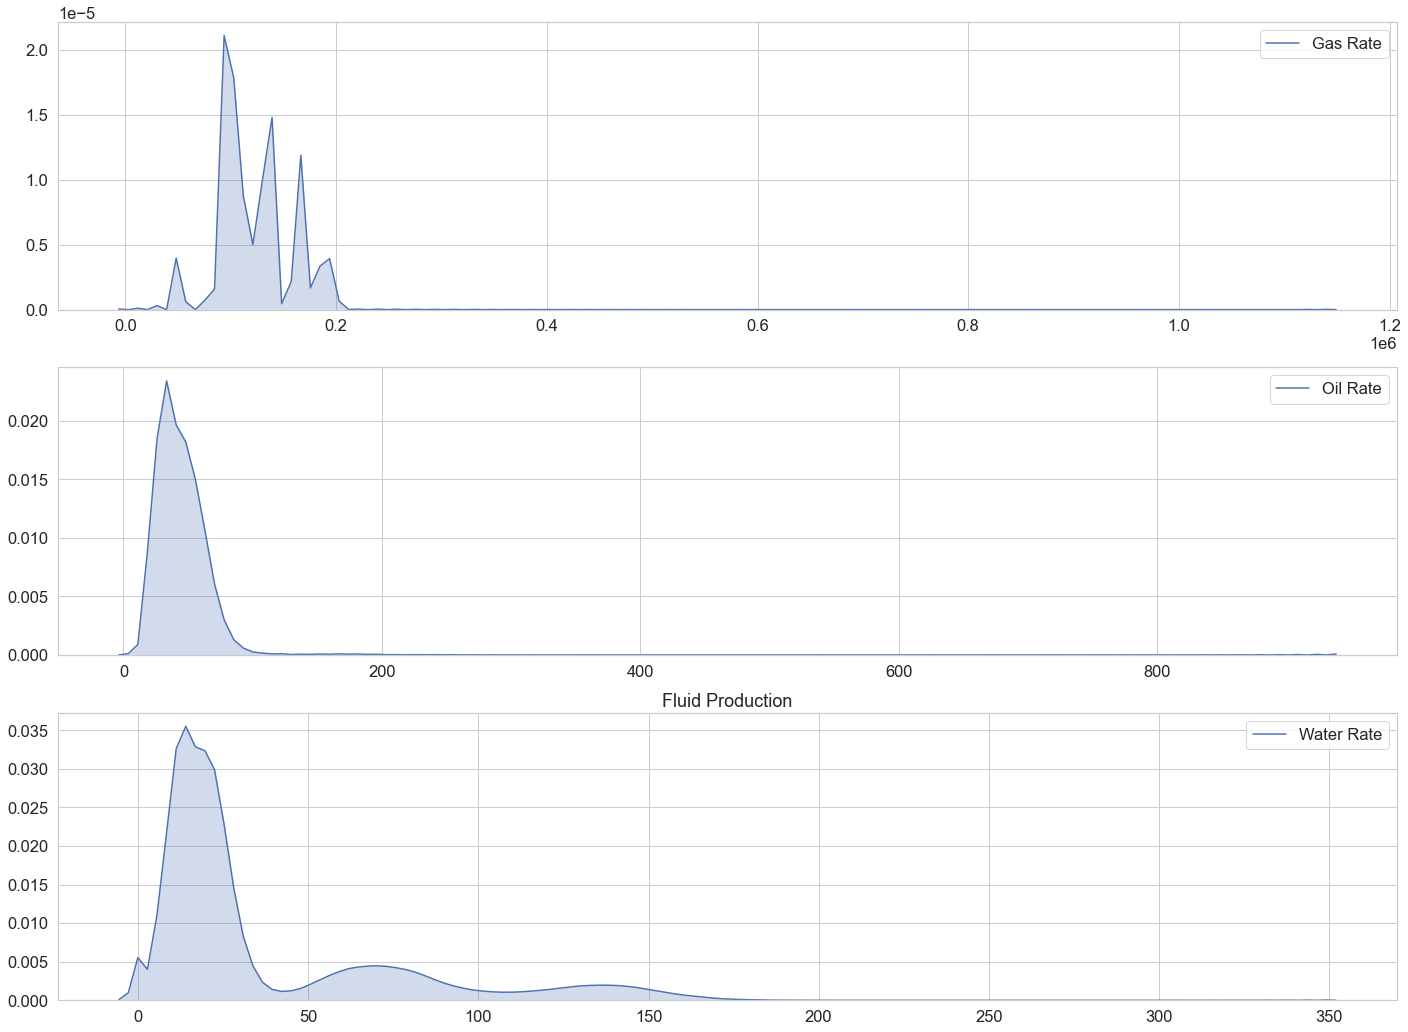

In [14]:

import seaborn as sns
import matplotlib.pyplot as plt

ds = ds_Qf.copy()
fig, ax = plt.subplots(3,figsize=(24,18))
#x1 = ds_data.query('WELL == "Lca-3083"|WELL == "Lca-3084"|WELL == "Lca-3085"')
#x1 = ds_data.query('WELL == "Lca-3083"')
plt.title("Fluid Production")
sns.kdeplot(ds['QgStd[m3/d]'], shade=True, label='Gas Rate',ax=ax[0])

sns.kdeplot(ds['QoStd[m3/d]'], shade=True, label='Oil Rate',ax=ax[1])

sns.kdeplot(ds['QwStd[m3/d]'], shade=True, label='Water Rate',ax=ax[2])

In [6]:

ds = ds2.copy()

import plotly

import plotly.graph_objs as go

# Create random data with numpy
import numpy as np


trace1 = go.Scatter(
    x = ds.index,
    y = ds['QoStd[m3/d]'],
    mode = 'lines',
    name = 'Oil Flow Rate'
)

trace2 = go.Scatter(
    x = ds.index,
    y = ds['QwStd[m3/d]'],
    mode = 'lines',
    name = 'Water Flow Rate'
)

data = [trace1, trace2]
plotly.offline.plot(data, filename='scatter-mode')

C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\plotly\offline\offline.py:563: UserWarning:

Your filename `scatter-mode` didn't end with .html. Adding .html to the end of your file.



'scatter-mode.html'

In [11]:
ds = ds2.copy()

import plotly

import plotly.graph_objs as go

# Create random data with numpy
import numpy as np


# Create traces
trace0 = go.Scatter(
    x = ds.index,
    y = ds['QgStd[m3/d]'],
    mode = 'lines',
    name = 'Gas Flow Rate'
)

data = [trace0]
plotly.offline.plot(data, filename='scatter-mode')

C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\plotly\offline\offline.py:563: UserWarning:

Your filename `scatter-mode` didn't end with .html. Adding .html to the end of your file.



'scatter-mode.html'

C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning:


The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.

C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDep

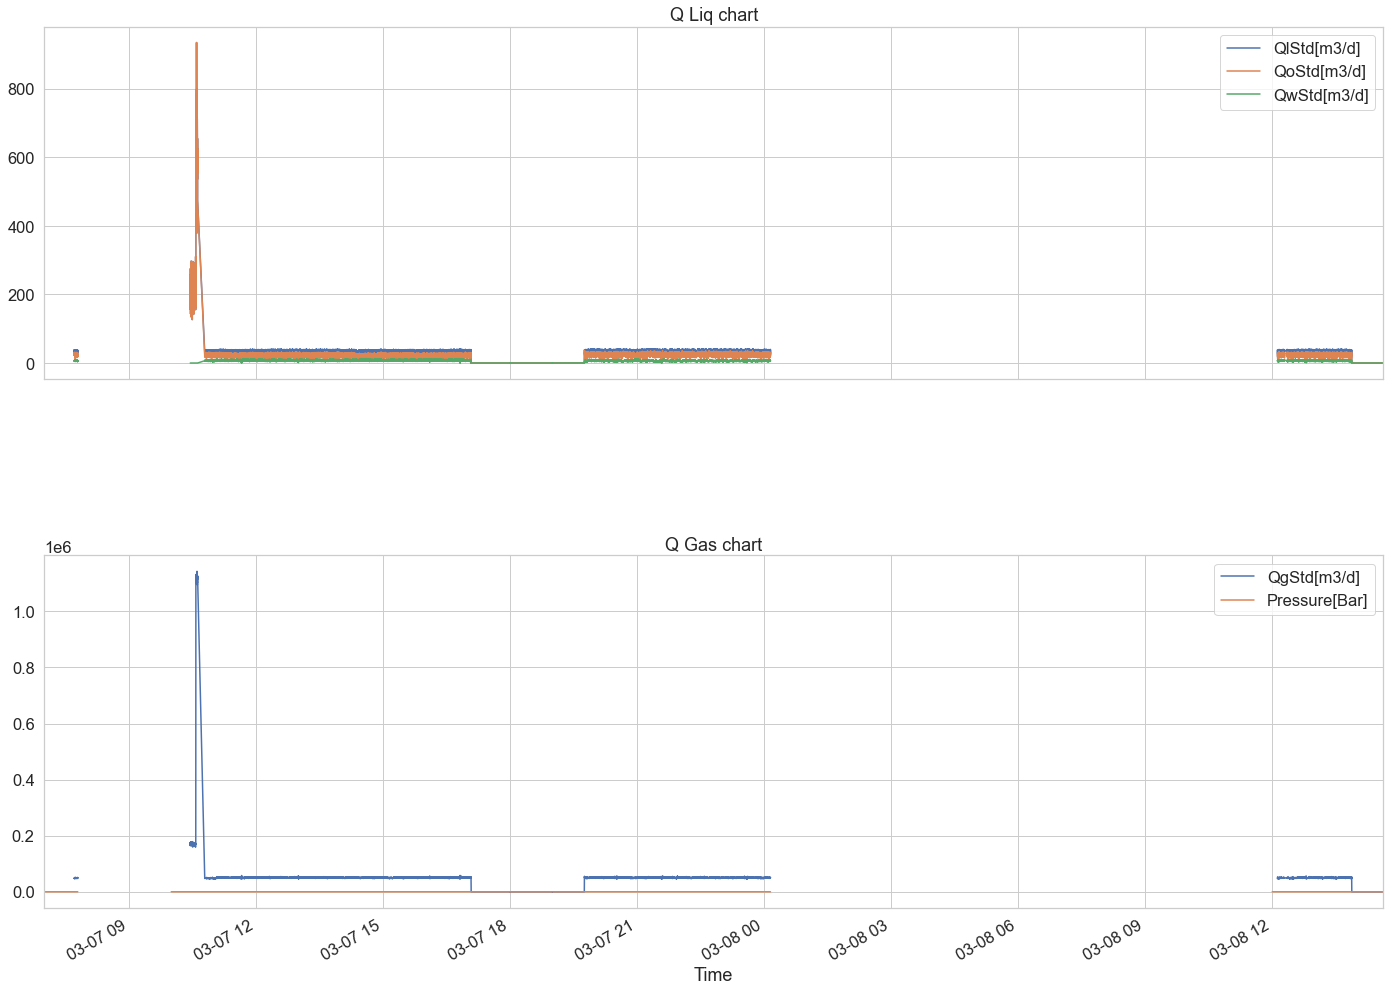

In [21]:
#ds_Qf['Time'] = pd.to_datetime(ds_Qf['Time'])
#ds_Qf.dtypes
fig, ax = plt.subplots(2,figsize=(24,18),sharex=True)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
ds.plot(y=['QlStd[m3/d]','QoStd[m3/d]','QwStd[m3/d]'],use_index=True, ax=ax[0])
ds.plot(y=['QgStd[m3/d]','Pressure[Bar]'],use_index=True, ax=ax[1])
ax[0].set(title="Q Liq chart")
ax[1].set(title="Q Gas chart")
plt.show()

C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning:


The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.

C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDep

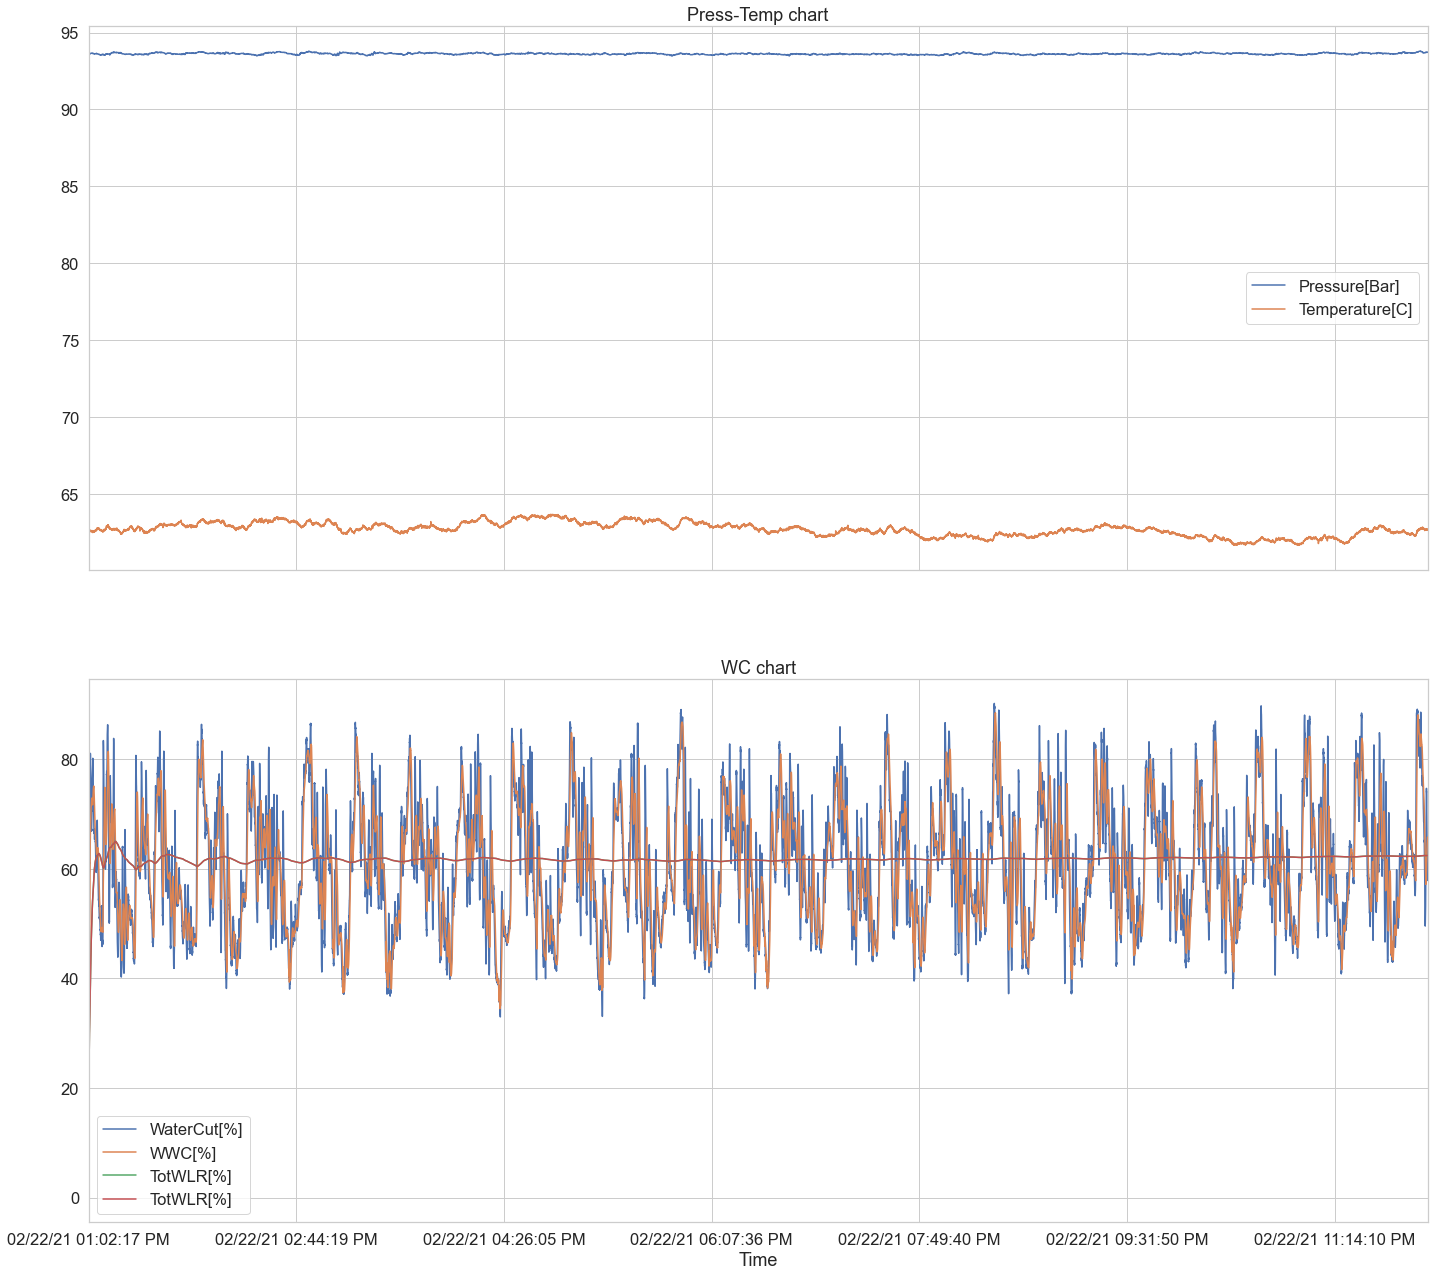

In [13]:
fig, ax = plt.subplots(2,figsize=(24,22),sharex=True)
ds_Qf.plot(x='Time', y=['Pressure[Bar]', 'Temperature[C]'],ax=ax[0])
ds_Qf.plot(x='Time', y=['WaterCut[%]', 'WWC[%]','TotWLR[%]'],ax=ax[1])
ax[0].set(title="Press-Temp chart")
ax[1].set(title="WC chart")
plt.show()
#plt.savefig('D:\Google Drive\Deep_Learning\Jupiter_Notebooks\outputs\11062020_PT_WC.png')

C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning:


The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.

C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDep

[Text(0.5, 1.0, 'Liquid Flow chart smoothed')]

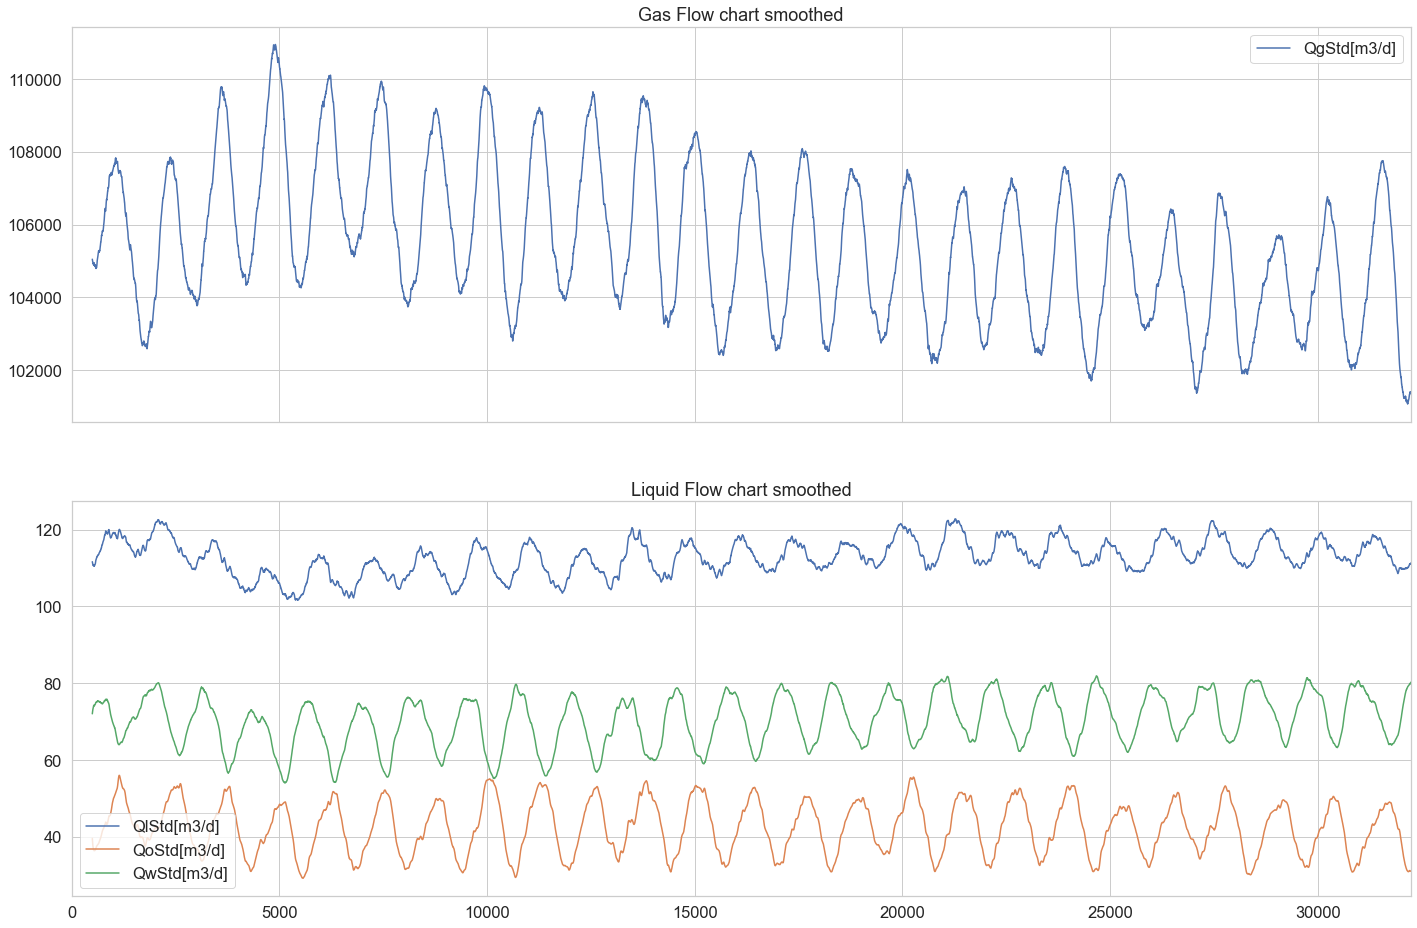

In [14]:
ds_rectified = ds_Q.drop(['Time'], axis=1)
ds_rectified = ds_rectified.apply(np.abs)
ds_envelope = ds_rectified.rolling(500).mean()

fig, ax = plt.subplots(2,figsize=(24,16),sharex=True)
ds_envelope.plot(y=['QgStd[m3/d]'], ax=ax[0])
ds_envelope.plot(y=['QlStd[m3/d]','QoStd[m3/d]','QwStd[m3/d]'], ax=ax[1])
ax[0].set(title="Gas Flow chart smoothed")
ax[1].set(title="Liquid Flow chart smoothed")
#plt.savefig('D:\Google Drive\Deep_Learning\Jupiter_Notebooks\outputs\11062020_flowAvg.png')

C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning:


The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.

C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDep

[Text(0.5, 1.0, 'Water Flow chart comp')]

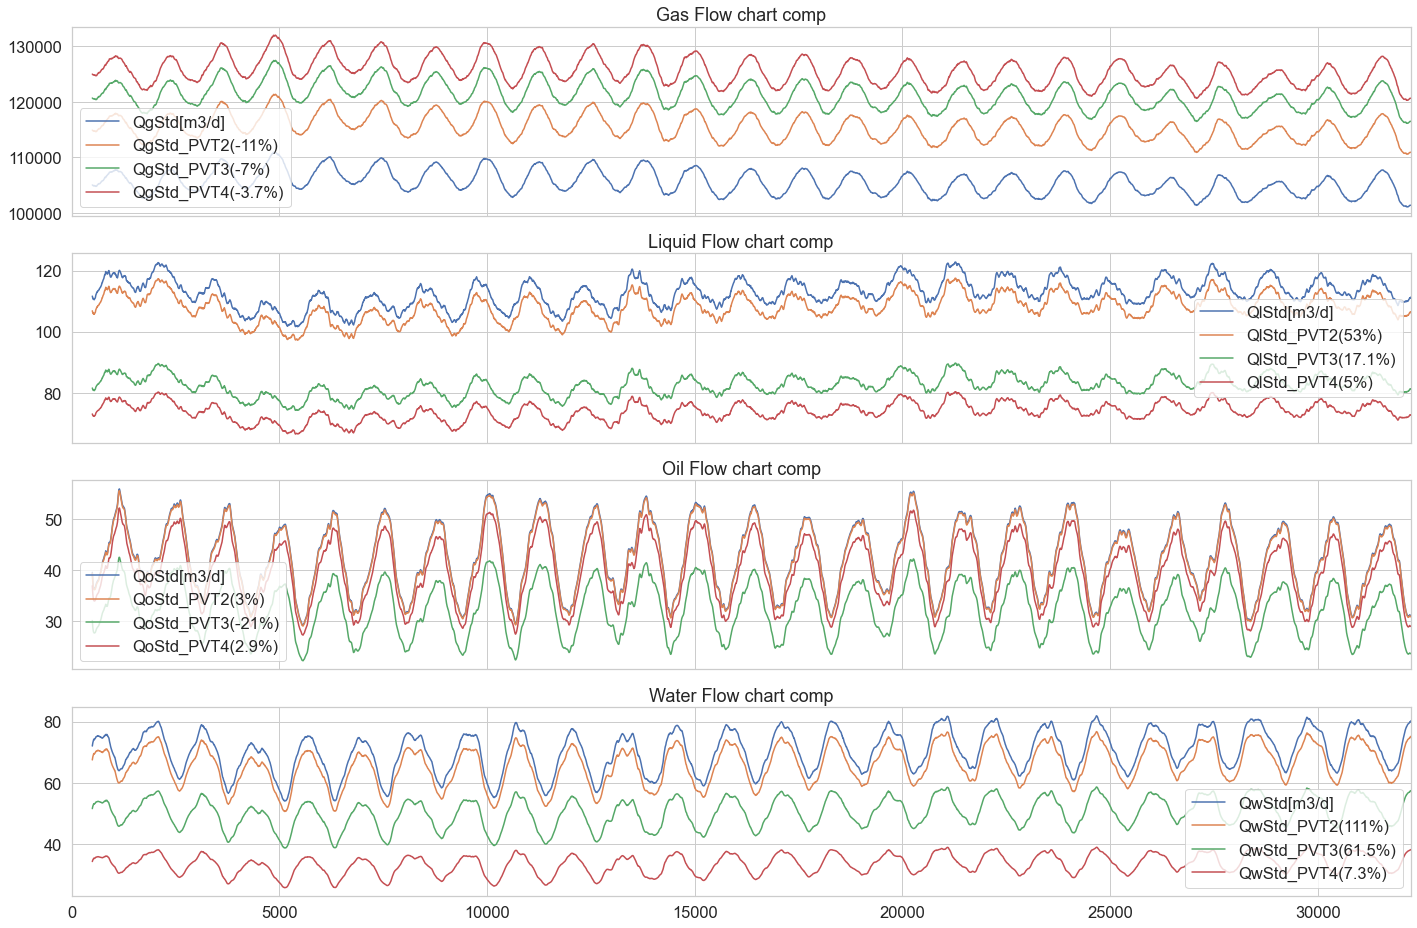

In [15]:
ds_envelope['QgStd_PVT2(-11%)']=ds_envelope['QgStd[m3/d]']*1.094
ds_envelope['QgStd_PVT3(-7%)']=ds_envelope['QgStd[m3/d]']*1.149
ds_envelope['QgStd_PVT4(-3.7%)']=ds_envelope['QgStd[m3/d]']*1.19

ds_envelope['QlStd_PVT2(53%)']=ds_envelope['QlStd[m3/d]']*0.957
ds_envelope['QlStd_PVT3(17.1%)']=ds_envelope['QlStd[m3/d]']*0.731
ds_envelope['QlStd_PVT4(5%)']=ds_envelope['QlStd[m3/d]']*0.655

ds_envelope['QoStd_PVT2(3%)']=ds_envelope['QoStd[m3/d]']*0.994
ds_envelope['QoStd_PVT3(-21%)']=ds_envelope['QoStd[m3/d]']*0.760
ds_envelope['QoStd_PVT4(2.9%)']=ds_envelope['QoStd[m3/d]']*0.933

ds_envelope['QwStd_PVT2(111%)']=ds_envelope['QwStd[m3/d]']*0.937
ds_envelope['QwStd_PVT3(61.5%)']=ds_envelope['QwStd[m3/d]']*0.716
ds_envelope['QwStd_PVT4(7.3%)']=ds_envelope['QwStd[m3/d]']*0.476


fig, ax = plt.subplots(4,figsize=(24,16),sharex=True)
ds_envelope.plot(y=['QgStd[m3/d]','QgStd_PVT2(-11%)','QgStd_PVT3(-7%)','QgStd_PVT4(-3.7%)'], ax=ax[0])
ds_envelope.plot(y=['QlStd[m3/d]','QlStd_PVT2(53%)','QlStd_PVT3(17.1%)','QlStd_PVT4(5%)'], ax=ax[1])
ds_envelope.plot(y=['QoStd[m3/d]','QoStd_PVT2(3%)','QoStd_PVT3(-21%)','QoStd_PVT4(2.9%)'], ax=ax[2])
ds_envelope.plot(y=['QwStd[m3/d]','QwStd_PVT2(111%)','QwStd_PVT3(61.5%)','QwStd_PVT4(7.3%)'], ax=ax[3])

ax[0].set(title="Gas Flow chart comp")
ax[1].set(title="Liquid Flow chart comp")
ax[2].set(title="Oil Flow chart comp")
ax[3].set(title="Water Flow chart comp")



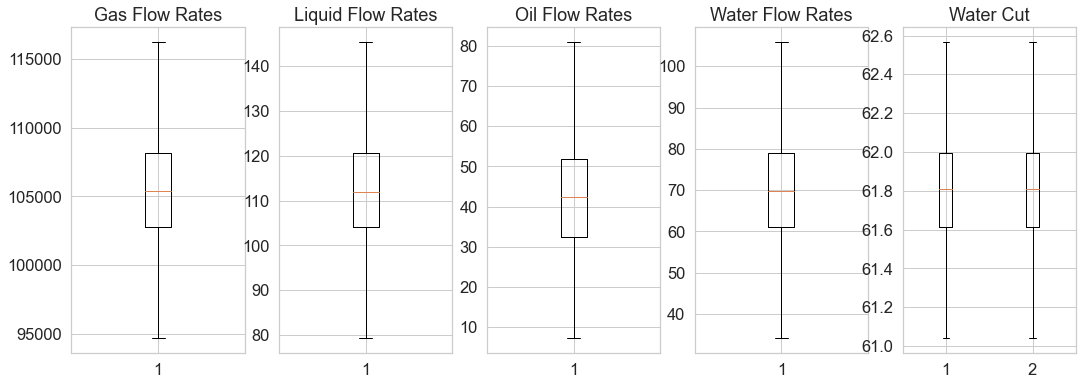

In [16]:
fig1, ax = plt.subplots(1,5,figsize=(18,6))
ax[0].set_title('Gas Flow Rates')
ax[1].set_title('Liquid Flow Rates')
ax[2].set_title('Oil Flow Rates')
ax[3].set_title('Water Flow Rates')
ax[4].set_title('Water Cut')
ax[0].boxplot(ds_Qf['QgStd[m3/d]'],showfliers=False)
ax[1].boxplot(ds_Qf['QlStd[m3/d]'],showfliers=False)
ax[2].boxplot(ds_Qf['QoStd[m3/d]'],showfliers=False)
ax[3].boxplot(ds_Qf['QwStd[m3/d]'],showfliers=False)
ax[4].boxplot(ds_Qf['TotWLR[%]'],showfliers=False)
# plt.savefig('D:\Google Drive\Deep_Learning\Jupiter_Notebooks\outputs\10062020_BoxPlot.png')
plt.show()

In [5]:
ds_FP.describe()

,Pressure[Bar],DP[Bar],Temperature[C],Velocity[m/s],Quality,WaterCut[%],Xl,WWC[%],ch1[nA],ch2[nA],...,TotWLR[%],TotGOR,GVF[%],XLM,Frg_dp_out,GasDen[kg/m3],GasVisc[cP],Kappa,LiqDen[kg/m3],LiqVisc[cP]
count,25591.000000,25591.000000,25591.000000,25591.000000,25591.000000,25591.000000,25591.000000,25591.000000,25591.000000,25591.000000,...,25591.000000,25591.000000,25590.000000,25590.000000,25591.000000,25591.000000,2.559100e+04,25591.000000,25591.000000,25591.000000
mean,93.679057,0.045043,53.974419,6.818852,0.512706,61.122348,0.789623,61.121524,5630.238884,130.276545,...,71.737686,2165.542133,82.617563,0.664299,1.024608,86.210861,1.474098e-05,1.526935,851.906462,0.000591
std,0.217744,0.002114,0.471343,0.098715,0.078333,0.350642,0.004412,0.286692,159.235555,6.786136,...,0.640241,38.638355,2.276444,0.106384,0.049411,0.198147,1.452369e-08,0.000811,1.293958,0.000005
min,93.028885,0.033886,52.667702,5.013890,-1.000000,55.431381,0.773021,59.149845,5088.697754,109.966980,...,0.000000,0.000000,63.035579,0.199765,0.000000,85.616947,1.469703e-05,1.524820,842.691766,0.000582
25%,93.617401,0.043717,53.620392,6.761225,0.503646,60.911804,0.786735,60.944796,5504.105469,125.527931,...,71.676386,2147.789236,81.261030,0.595231,0.993831,86.061507,1.473722e-05,1.526316,851.093171,0.000588
50%,93.706863,0.044924,54.012276,6.820537,0.533019,61.107536,0.789584,61.105873,5614.789062,129.560974,...,71.735886,2152.696617,82.694380,0.657999,1.024745,86.203999,1.474461e-05,1.526807,851.816737,0.000591
75%,93.846699,0.046190,54.357185,6.879527,0.557475,61.320839,0.792417,61.287838,5747.868652,134.194260,...,71.792423,2163.880168,84.075381,0.724942,1.055483,86.356644,1.474996e-05,1.527633,852.604837,0.000595
max,94.347908,0.060678,54.908920,7.203441,0.686104,62.667538,0.828919,62.406422,6756.182129,195.439804,...,72.402104,2320.599428,94.033156,1.845333,1.313892,86.691101,1.478301e-05,1.529049,857.861871,0.000605


In [18]:
ds_Q[['Pressure[Bar]','Temperature[C]','Qo[m3/s]', 'QoStd[m3/s]']].corr()

,Pressure[Bar],Temperature[C],Qo[m3/s],QoStd[m3/s]
Pressure[Bar],1.000000,0.384940,0.070101,0.069308
Temperature[C],0.384940,1.000000,0.183123,0.189883
Qo[m3/s],0.070101,0.183123,1.000000,0.999969
QoStd[m3/s],0.069308,0.189883,0.999969,1.000000


In [17]:
#to change data around std desv

ds_Q.columns
mean1 = ds_Q['Pressure[Bar]'].mean()
std1 = ds_Q['Pressure[Bar]'].std()
cut_off = std1 * 3
lower, upper = mean1 - cut_off, mean1 + cut_off
new_df = ds_Q[(ds_Q['Pressure[Bar]']<upper) & (ds_Q['Pressure[Bar]']>lower)]



In [15]:
#to export to csv
ds_min.to_csv('D:\Google Drive\Deep_Learning\Jupiter_Notebooks\ds\Laborales\G2\out\ds_Qf_10062020.csv')
#ds_Qf.describe().to_csv('D:\Google Drive\Deep_Learning\Jupiter_Notebooks\ds\Laborales\G2\out\ds_Qf_described_10062020.csv')

In [1]:
#TO combine multiple files


import glob
import pandas as pd

# get data file names
path = r'D:\OneDrive\OneDrive - WFT\Compartido\Well_Datasets\La_Calera_Pluspetrol\FSF_mov\logs'
#path = r'D:\OneDrive\OneDrive - WFT\Compartido\Well_Datasets\La_Calera_Pluspetrol\FSF_mov'
filenames = glob.glob(path + "\*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename,low_memory=False).assign(filename = filename))

# Concatenate all data into one DataFrame
big_frame = pd.concat(dfs, ignore_index=True,sort=False)

big_frame.to_csv(r"D:\OneDrive\OneDrive - WFT\Compartido\Well_Datasets\La_Calera_Pluspetrol\FSF_mov\logs\LC_raw_full.csv", index=False, encoding='utf-8-sig')
#big_frame.to_csv(r"D:\OneDrive\OneDrive - WFT\Compartido\Well_Datasets\La_Calera_Pluspetrol\FSF_mov\LC_fsf_full.csv", index=False, encoding='utf-8-sig')

In [2]:
big_frame.describe()

,Well No.,Pressure[Bar],DP[Bar],Temperature[C],Velocity[m/s],Quality,Gamma_Dens[kg/m3],Raw_Dens,WaterCut[%],Xl,...,Tau,diffPress_Input[bar],diffPressZero[bar],ParamFile,PVTFile,Rhog,Rhol,Rhoo,Rhow,ALPHA1
count,1.011680e+06,1.011680e+06,1.011680e+06,1.011680e+06,1.011680e+06,1.011680e+06,1011680.0,1011680.0,1.011680e+06,1.011680e+06,...,1.011680e+06,1.011680e+06,1011680.0,1.011680e+06,1.011680e+06,1.011680e+06,1.011680e+06,1.011680e+06,1.011680e+06,0.0
mean,6.178681e+00,9.156742e+01,4.229517e-02,5.927865e+01,7.396042e+00,7.144265e-01,0.0,0.0,3.896751e+01,1.771636e-01,...,9.837162e-01,4.229517e-02,0.0,5.098807e+04,6.294547e+03,7.618471e+01,7.607153e+02,4.854334e+02,1.200638e+03,NaN
std,1.441547e+00,3.611152e+00,2.806291e-02,4.915682e+00,2.296339e+00,2.179121e-01,0.0,0.0,2.274537e+01,3.073375e-01,...,1.247370e-01,2.806291e-02,0.0,1.045836e+04,1.821164e+02,9.978556e+00,1.831978e+02,6.163698e+01,1.522664e+02,NaN
min,1.000000e+00,0.000000e+00,-3.917243e-03,0.000000e+00,6.000000e-16,-1.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,...,0.000000e+00,-3.917243e-03,0.0,3.468000e+03,6.293000e+03,-6.930033e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
25%,5.000000e+00,9.049251e+01,2.579673e-02,5.799479e+01,5.872115e+00,6.374322e-01,0.0,0.0,2.543112e+01,1.418093e-01,...,9.994793e-01,2.579673e-02,0.0,5.329100e+04,6.293000e+03,7.651078e+01,6.775387e+02,4.910421e+02,1.218655e+03,NaN
50%,7.000000e+00,9.106241e+01,3.551852e-02,5.979414e+01,7.128405e+00,7.762066e-01,0.0,0.0,2.803287e+01,1.658581e-01,...,9.996096e-01,3.551852e-02,0.0,5.329100e+04,6.293000e+03,7.706147e+01,6.962979e+02,4.938841e+02,1.219722e+03,NaN
75%,7.000000e+00,9.359428e+01,4.666671e-02,6.141367e+01,8.744026e+00,8.112963e-01,0.0,0.0,4.969304e+01,1.861594e-01,...,9.996952e-01,4.666671e-02,0.0,5.329100e+04,6.293000e+03,7.788879e+01,8.356848e+02,4.943839e+02,1.220905e+03,NaN
max,7.000000e+00,1.031590e+02,1.945198e-01,6.843971e+01,9.232465e+01,9.060296e-01,0.0,0.0,1.000000e+02,1.023728e+01,...,9.999795e-01,1.945198e-01,0.0,5.329100e+04,2.773300e+04,1.018664e+02,1.228657e+03,6.013839e+02,1.241063e+03,NaN


In [3]:
mask = (ds2['Time'] > '2021-02-22 13:00:00') & (ds2['Time'] <= '2021-02-23 14:00:00')

ds3 = big_frame.loc[mask]

ds3.head()




NameError: name 'ds2' is not defined